In [1]:
import numpy as np
import matplotlib.pyplot as plt

def localtime_aligner(dat,nx,deg):
    dat_local = np.zeros_like(dat)
    j=0 # initialize
    for i in range(nx):
        if (abs(15*j-deg*i) < 7.5):
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
        else:
            j=j+1
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
    return dat_local

def roll_longitude(dat,nx):
    return np.roll(dat, int(nx/2), axis=-1)

def zonal_mean(dat):
    return np.mean(dat, axis=-1)

def day_average(dat): # data.shape should be [nf,nv,nd,nt,nz,ny,nx]
    return np.mean(dat, axis=2)

def colwi2_to_opacity(colwi2):
    Mice = colwi2
    Qext = 2 # single scattering extinction coefficient
    rho_ice = 920 # the density of ice
    r_eff = 5.e-6 # the cloud particle effective radius
    opacity = 3/4 * Mice * Qext / rho_ice / r_eff
    return opacity

Ls = {
    '0':0,
    '30':61,
    '60':126,
    '90':193,
    '120':257,
    '150':317,
    '180':371,
    '210':421,
    '240':468,
    '270':514,
    '300':562,
    '330':612,
    '360':668,
}
#print(Ls['30'])

Ls = [
      0.250,   0.761,   1.270,   1.779,   2.286,   2.793,   3.299,
      3.804,   4.309,   4.812,   5.315,   5.817,   6.319,   6.819,
      7.319,   7.818,   8.316,   8.814,   9.311,   9.807,  10.302,
     10.797,  11.291,  11.784,  12.277,  12.768,  13.260,  13.750,
     14.240,  14.729,  15.217,  15.705,  16.192,  16.679,  17.165,
     17.650,  18.134,  18.618,  19.102,  19.584,  20.066,  20.548,
     21.029,  21.509,  21.988,  22.468,  22.946,  23.424,  23.901,
     24.378,  24.854,  25.330,  25.805,  26.279,  26.753,  27.227,
     27.700,  28.172,  28.644,  29.115,  29.586,  30.057,  30.526,
     30.996,  31.465,  31.933,  32.401,  32.868,  33.335,  33.802,
     34.268,  34.734,  35.199,  35.664,  36.128,  36.592,  37.055,
     37.518,  37.981,  38.443,  38.905,  39.367,  39.828,  40.288,
     40.749,  41.209,  41.668,  42.127,  42.586,  43.045,  43.503,
     43.961,  44.418,  44.875,  45.332,  45.789,  46.245,  46.701,
     47.157,  47.612,  48.067,  48.522,  48.976,  49.430,  49.884,
     50.338,  50.792,  51.245,  51.698,  52.150,  52.603,  53.055,
     53.507,  53.959,  54.411,  54.862,  55.313,  55.764,  56.215,
     56.666,  57.116,  57.567,  58.017,  58.467,  58.917,  59.367,
     59.816,  60.266,  60.715,  61.164,  61.613,  62.062,  62.511,
     62.960,  63.409,  63.857,  64.306,  64.754,  65.203,  65.651,
     66.099,  66.547,  66.995,  67.444,  67.892,  68.340,  68.788,
     69.236,  69.684,  70.132,  70.580,  71.028,  71.476,  71.924,
     72.372,  72.820,  73.268,  73.717,  74.165,  74.613,  75.062,
     75.510,  75.958,  76.407,  76.856,  77.304,  77.753,  78.202,
     78.651,  79.100,  79.550,  79.999,  80.449,  80.898,  81.348,
     81.798,  82.248,  82.698,  83.149,  83.599,  84.050,  84.501,
     84.952,  85.404,  85.855,  86.307,  86.759,  87.211,  87.664,
     88.116,  88.569,  89.022,  89.475,  89.929,  90.383,  90.837,
     91.291,  91.746,  92.201,  92.656,  93.112,  93.568,  94.024,
     94.480,  94.937,  95.394,  95.851,  96.309,  96.767,  97.225,
     97.684,  98.143,  98.602,  99.062,  99.522,  99.983, 100.440,
    100.910, 101.370, 101.830, 102.290, 102.750, 103.220, 103.680,
    104.150, 104.610, 105.080, 105.540, 106.010, 106.470, 106.940,
    107.410, 107.870, 108.340, 108.810, 109.280, 109.750, 110.220,
    110.690, 111.160, 111.630, 112.110, 112.580, 113.050, 113.530,
    114.000, 114.470, 114.950, 115.430, 115.900, 116.380, 116.860,
    117.340, 117.810, 118.290, 118.770, 119.250, 119.740, 120.220,
    120.700, 121.180, 121.670, 122.150, 122.640, 123.120, 123.610,
    124.090, 124.580, 125.070, 125.560, 126.050, 126.540, 127.030,
    127.520, 128.010, 128.510, 129.000, 129.490, 129.990, 130.490,
    130.980, 131.480, 131.980, 132.480, 132.980, 133.480, 133.980,
    134.480, 134.980, 135.480, 135.990, 136.490, 137.000, 137.510,
    138.010, 138.520, 139.030, 139.540, 140.050, 140.560, 141.070,
    141.590, 142.100, 142.610, 143.130, 143.650, 144.160, 144.680,
    145.200, 145.720, 146.240, 146.760, 147.280, 147.810, 148.330,
    148.860, 149.380, 149.910, 150.440, 150.970, 151.500, 152.030,
    152.560, 153.090, 153.620, 154.160, 154.690, 155.230, 155.770,
    156.300, 156.840, 157.380, 157.920, 158.470, 159.010, 159.550,
    160.100, 160.640, 161.190, 161.740, 162.290, 162.840, 163.390,
    163.940, 164.490, 165.040, 165.600, 166.150, 166.710, 167.270,
    167.830, 168.390, 168.950, 169.510, 170.070, 170.630, 171.200,
    171.770, 172.330, 172.900, 173.470, 174.040, 174.610, 175.180,
    175.750, 176.330, 176.900, 177.480, 178.050, 178.630, 179.210,
    179.790, 180.370, 180.950, 181.540, 182.120, 182.700, 183.290,
    183.880, 184.470, 185.050, 185.640, 186.230, 186.830, 187.420,
    188.010, 188.610, 189.200, 189.800, 190.400, 191.000, 191.600,
    192.200, 192.800, 193.400, 194.000, 194.610, 195.210, 195.820,
    196.430, 197.030, 197.640, 198.250, 198.860, 199.480, 200.090,
    200.700, 201.320, 201.930, 202.550, 203.160, 203.780, 204.400,
    205.020, 205.640, 206.260, 206.880, 207.510, 208.130, 208.750,
    209.380, 210.000, 210.630, 211.260, 211.890, 212.520, 213.150,
    213.780, 214.410, 215.040, 215.670, 216.300, 216.940, 217.570,
    218.210, 218.840, 219.480, 220.110, 220.750, 221.390, 222.030,
    222.670, 223.310, 223.950, 224.590, 225.230, 225.870, 226.520,
    227.160, 227.800, 228.450, 229.090, 229.740, 230.380, 231.030,
    231.670, 232.320, 232.960, 233.610, 234.260, 234.910, 235.550,
    236.200, 236.850, 237.500, 238.150, 238.800, 239.450, 240.100,
    240.750, 241.400, 242.050, 242.700, 243.350, 244.000, 244.650,
    245.310, 245.960, 246.610, 247.260, 247.910, 248.560, 249.210,
    249.870, 250.520, 251.170, 251.820, 252.470, 253.120, 253.780,
    254.430, 255.080, 255.730, 256.380, 257.030, 257.680, 258.330,
    258.980, 259.630, 260.280, 260.930, 261.580, 262.230, 262.880,
    263.530, 264.180, 264.830, 265.480, 266.120, 266.770, 267.420,
    268.060, 268.710, 269.350, 270.000, 270.650, 271.290, 271.930,
    272.580, 273.220, 273.860, 274.510, 275.150, 275.790, 276.430,
    277.070, 277.710, 278.350, 278.990, 279.620, 280.260, 280.900,
    281.530, 282.170, 282.800, 283.440, 284.070, 284.700, 285.330,
    285.970, 286.600, 287.230, 287.850, 288.480, 289.110, 289.740,
    290.360, 290.990, 291.610, 292.240, 292.860, 293.480, 294.100,
    294.730, 295.340, 295.960, 296.580, 297.200, 297.820, 298.430,
    299.050, 299.660, 300.270, 300.880, 301.500, 302.100, 302.710,
    303.330, 303.930, 304.540, 305.140, 305.750, 306.350, 306.950,
    307.560, 308.160, 308.760, 309.360, 309.950, 310.550, 311.150,
    311.740, 312.340, 312.930, 313.520, 314.110, 314.700, 315.290,
    315.880, 316.470, 317.050, 317.640, 318.220, 318.810, 319.390,
    319.970, 320.550, 321.130, 321.710, 322.290, 322.860, 323.440,
    324.010, 324.580, 325.160, 325.730, 326.300, 326.870, 327.430,
    328.000, 328.570, 329.130, 329.700, 330.260, 330.820, 331.380,
    331.940, 332.500, 333.060, 333.620, 334.170, 334.730, 335.280,
    335.840, 336.390, 336.940, 337.490, 338.040, 338.590, 339.130,
    339.680, 340.220, 340.770, 341.310, 341.850, 342.390, 342.940,
    343.470, 344.010, 344.550, 345.090, 345.620, 346.160, 346.690,
    347.220, 347.760, 348.290, 348.820, 349.350, 349.870, 350.400,
    350.930, 351.450, 351.980, 352.500, 353.020, 353.550, 354.070,
    354.590, 355.110, 355.620, 356.140, 356.660, 357.170, 357.690,
    358.200, 358.720, 359.230, 359.740
]

print(sorted(plt.rcParams.keys()))
#print(plt.rcParams['font.size'])
#print(plt.rcParams['font.family'])
#print(plt.rcParams['mathtext.fontset'])
#print(plt.rcParams['mathtext.rm'])
#print(plt.rcParams['figure.figsize'])
#print(plt.rcParams['xtick.major.size'])
#print(plt.rcParams['ytick.major.size'])
#print(plt.rcParams['figure.autolayout'])
config = {
    'font.size':12.,
    'font.family':['DejaVu Serif'],
    'mathtext.fontset':'dejavuserif',
    'mathtext.rm':'DejaVu Serif',
    'figure.autolayout':True
}
plt.rcParams.update(config)

['_internal.classic_mode', 'agg.path.chunksize', 'animation.avconv_args', 'animation.avconv_path', 'animation.bitrate', 'animation.codec', 'animation.convert_args', 'animation.convert_path', 'animation.embed_limit', 'animation.ffmpeg_args', 'animation.ffmpeg_path', 'animation.frame_format', 'animation.html', 'animation.html_args', 'animation.writer', 'axes.autolimit_mode', 'axes.axisbelow', 'axes.edgecolor', 'axes.facecolor', 'axes.formatter.limits', 'axes.formatter.min_exponent', 'axes.formatter.offset_threshold', 'axes.formatter.use_locale', 'axes.formatter.use_mathtext', 'axes.formatter.useoffset', 'axes.grid', 'axes.grid.axis', 'axes.grid.which', 'axes.labelcolor', 'axes.labelpad', 'axes.labelsize', 'axes.labelweight', 'axes.linewidth', 'axes.prop_cycle', 'axes.spines.bottom', 'axes.spines.left', 'axes.spines.right', 'axes.spines.top', 'axes.titlepad', 'axes.titlesize', 'axes.titleweight', 'axes.unicode_minus', 'axes.xmargin', 'axes.ymargin', 'axes3d.grid', 'backend', 'backend_fall

In [2]:
files = [
    '/mnt/dram2/koba/data/251106-t21-MIRAI1k-inactive/',
]
variables = [
    'PS-1h',
    'TS-1h',
    'colwv2-1h',
    'colwi2-1h',
]
nf,nv,nd,nt,nz,ny,nx = len(files),len(variables),100,24,1,32,64
data = np.zeros((nf,nv,nd*nt*nz*ny*nx))
for i in range(nf):
    for j in range(nv):
        print(files[i] + variables[j] + '.asc')
        data[i,j] = np.loadtxt(files[i] + variables[j] + '.asc')
data_reshape = data.reshape(nf,nv,nd,nt,nz,ny,nx)
print(data.shape)
print(data_reshape.shape)

/mnt/dram2/koba/data/251106-t21-MIRAI1k-inactive/PS-1h.asc


/mnt/dram2/koba/data/251106-t21-MIRAI1k-inactive/TS-1h.asc
/mnt/dram2/koba/data/251106-t21-MIRAI1k-inactive/colwv2-1h.asc
/mnt/dram2/koba/data/251106-t21-MIRAI1k-inactive/colwi2-1h.asc
(1, 4, 4915200)
(1, 4, 100, 24, 1, 32, 64)


In [3]:
deg = 5.625
data_local = localtime_aligner(data_reshape,nx,deg)
data_roll = roll_longitude(data_local,nx)
data_zm = zonal_mean(data_roll)
print(data_local.shape)
print(data_roll.shape)
print(data_zm.shape)

(1, 4, 100, 24, 1, 32, 64)
(1, 4, 100, 24, 1, 32, 64)
(1, 4, 100, 24, 1, 32)


k,j,i =  0 0 0


k,j,i =  1 0 1
k,j,i =  2 0 2
k,j,i =  3 0 3


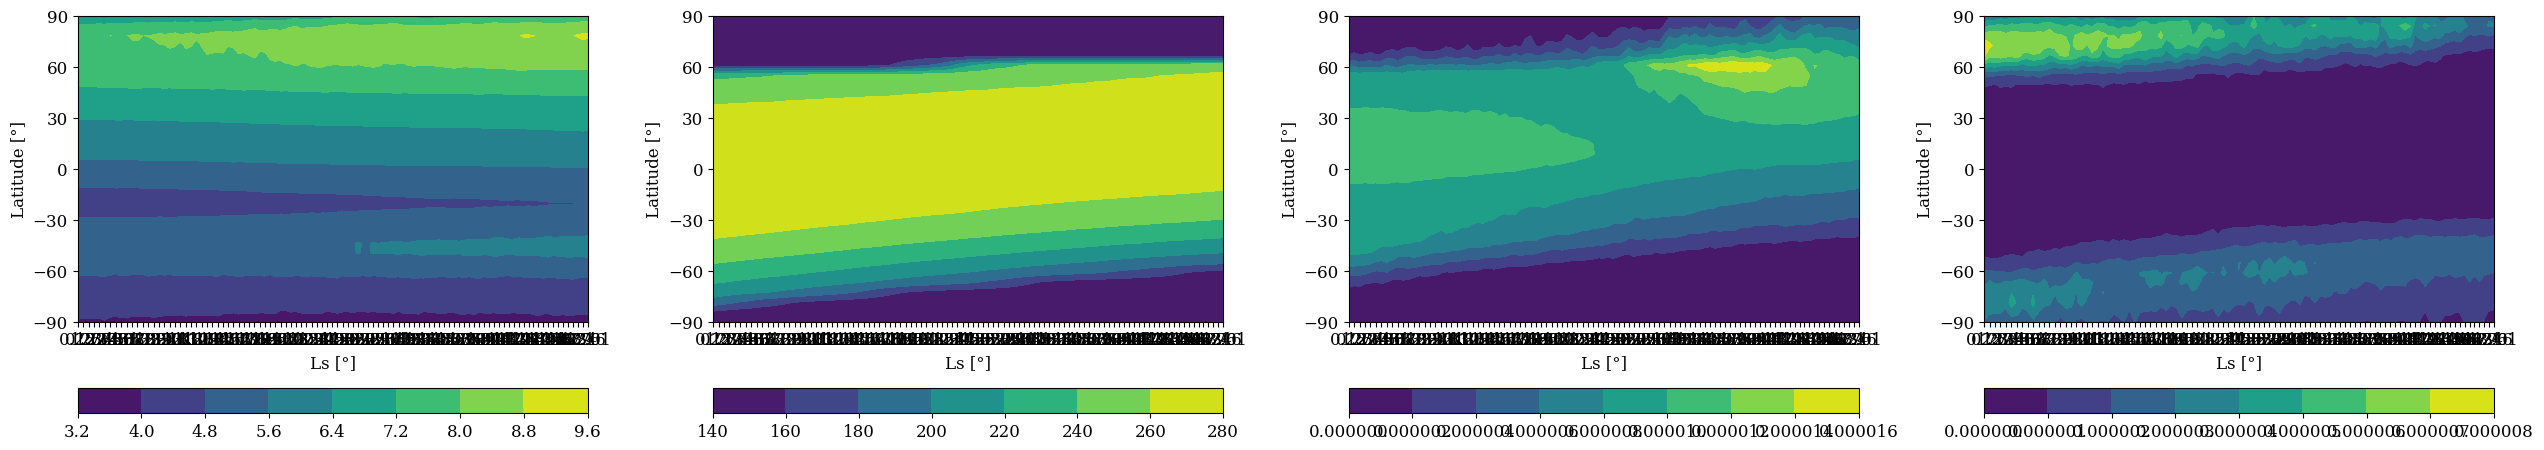

In [4]:
ncols,nrows=4,1
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]

fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(ncols*nrows):
    k,j = i%ncols,int(i/ncols)
    print('k,j,i = ', k,j,i)

    if (ncols==1 and nrows==1):
        ax=axes
    elif (ncols==1):
        ax=axes[j]
    elif (nrows==1):
        ax=axes[k]
    else:
        ax=axes[j,k]
    
    mappable = ax.contourf(
        Ls[:100], np.linspace(-90,90,ny)[::-1],
        data_zm[0, k, :, 14, 0, :].T,
    )
    plt.colorbar(
        mappable, ax=ax, orientation='horizontal',
    )
    ax.set_xticks(Ls[:100])
    ax.set_yticks(np.linspace(-90,90,7))
    ax.set_xlabel('Ls [°]')
    ax.set_ylabel('Latitude [°]')
plt.show()

In [5]:
files = [
    '/mnt/dram2/koba/data/Kobayashi-2026/MIRAI1k-inactive/Localtime/',
]
variables = [
    'PS-1h',
    'TS-1h',
    'colwv2-1h',
    'colwi2-1h',
]
nf,nv,nd,nt,nz,ny,nx = len(files),len(variables),669,24,1,32,64
data = np.zeros((nf,nv,nd*nt*nz*ny*nx))
for i in range(nf):
    for j in range(nv):
        print(files[i] + variables[j] + '.asc')
        data[i,j] = np.loadtxt(files[i] + variables[j] + '.asc')
data_reshape = data.reshape(nf,nv,nd,nt,nz,ny,nx)
print(data.shape)
print(data_reshape.shape)

/mnt/dram2/koba/data/Kobayashi-2026/MIRAI1k-inactive/Localtime/PS-1h.asc


/mnt/dram2/koba/data/Kobayashi-2026/MIRAI1k-inactive/Localtime/TS-1h.asc
/mnt/dram2/koba/data/Kobayashi-2026/MIRAI1k-inactive/Localtime/colwv2-1h.asc
/mnt/dram2/koba/data/Kobayashi-2026/MIRAI1k-inactive/Localtime/colwi2-1h.asc
(1, 4, 32882688)
(1, 4, 669, 24, 1, 32, 64)


In [6]:
deg = 5.625
data_local = localtime_aligner(data_reshape,nx,deg)
data_roll = roll_longitude(data_local,nx)
data_zm = zonal_mean(data_roll)
print(data_local.shape)
print(data_roll.shape)
print(data_zm.shape)

(1, 4, 669, 24, 1, 32, 64)
(1, 4, 669, 24, 1, 32, 64)
(1, 4, 669, 24, 1, 32)


k,j,i =  0 0 0
k,j,i =  1 0 1
k,j,i =  2 0 2
k,j,i =  3 0 3


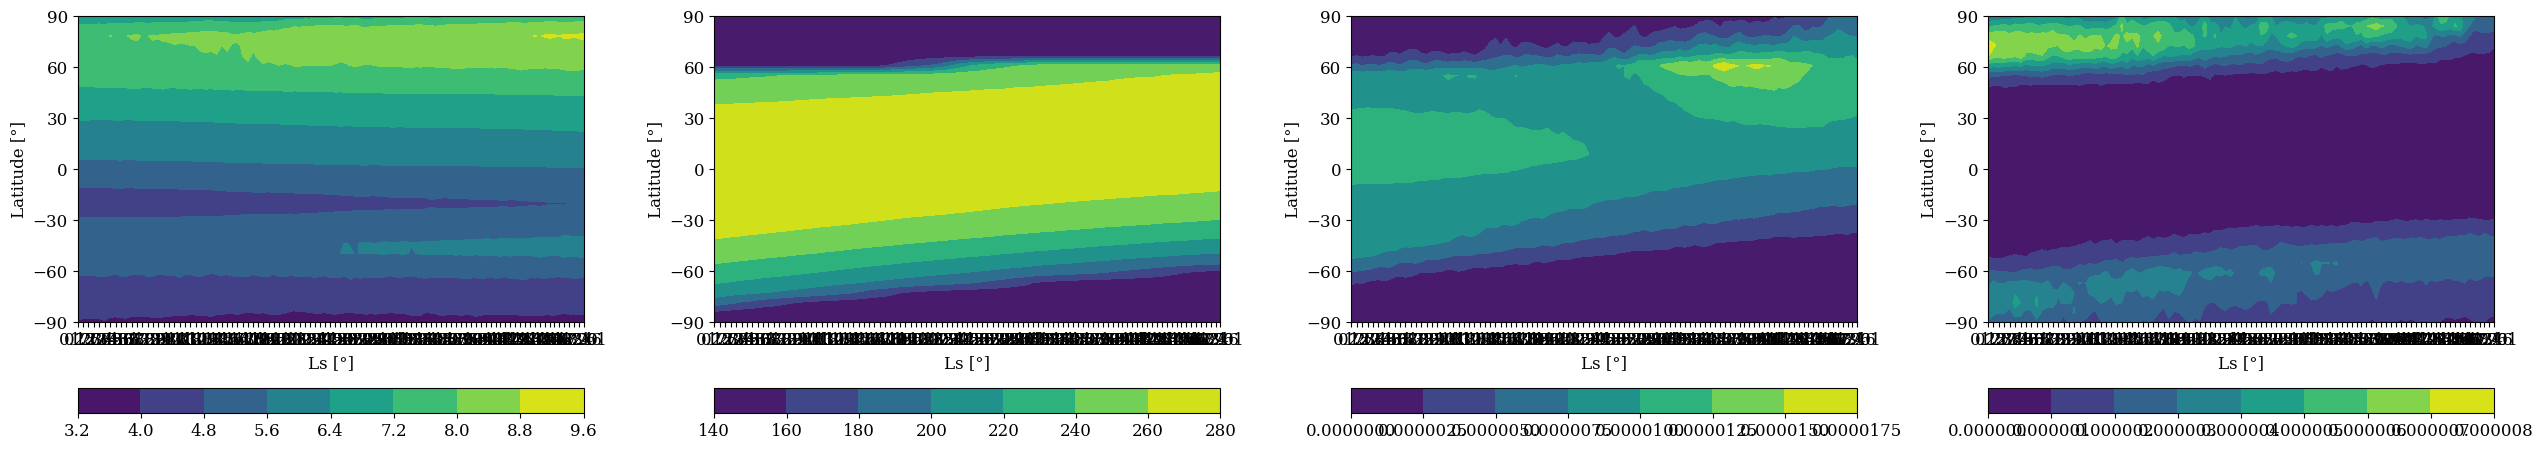

In [7]:
ncols,nrows=4,1
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows]

fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(ncols*nrows):
    k,j = i%ncols,int(i/ncols)
    print('k,j,i = ', k,j,i)

    if (ncols==1 and nrows==1):
        ax=axes
    elif (ncols==1):
        ax=axes[j]
    elif (nrows==1):
        ax=axes[k]
    else:
        ax=axes[j,k]
    
    mappable = ax.contourf(
        Ls[:100], np.linspace(-90,90,ny)[::-1],
        data_zm[0, k, :100, 14, 0, :].T,
    )
    plt.colorbar(
        mappable, ax=ax, orientation='horizontal',
    )
    ax.set_xticks(Ls[:100])
    ax.set_yticks(np.linspace(-90,90,7))
    ax.set_xlabel('Ls [°]')
    ax.set_ylabel('Latitude [°]')
plt.show()

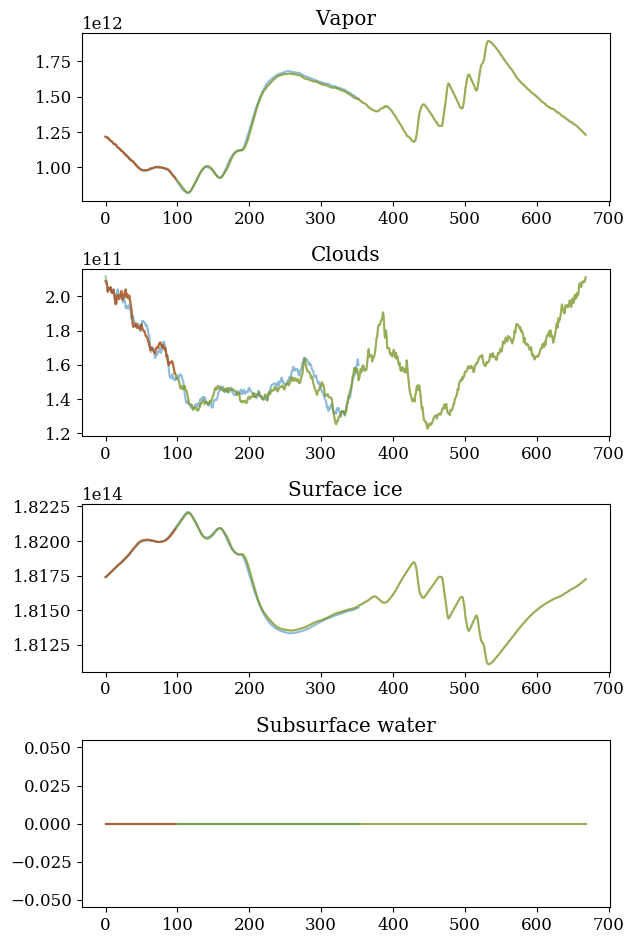

In [22]:
with open('/mnt/dram2/koba/data/251106-t21-MIRAI1k-inactive/H2OMASS.asc') as f:
    d1 = np.loadtxt(f, skiprows=1, usecols=[2,3,4,5])
with open('/mnt/dram2/koba/data/Kobayashi-2026/MIRAI1k-inactive/H2OMASS.asc') as f:
    d2 = np.loadtxt(f, skiprows=1, usecols=[2,3,4,5])
with open('/mnt/dram2/koba/data/Kobayashi-2026/MIRAI1k-inactive-test52/H2OMASS.asc') as f:
    d3 = np.loadtxt(f, skiprows=1, usecols=[2,3,4,5])
with open('/mnt/dram2/koba/data/251106b-t21-MIRAI1k-inactive/H2OMASS.asc') as f:
    d4 = np.loadtxt(f, skiprows=1, usecols=[2,3,4,5])

titles = [
    'Vapor',
    'Clouds',
    'Surface ice',
    'Subsurface water',
]

ncols,nrows = 1,4
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows*0.5]

fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(nrows):
    axes[i].plot(d1[:,i], alpha=0.5)
    axes[i].plot(d2[:,i], alpha=0.5)
    axes[i].plot(d3[669*4:,i], alpha=0.5)
    axes[i].plot(d4[:,i], alpha=0.5)
    axes[i].set_title(titles[i])
plt.show()

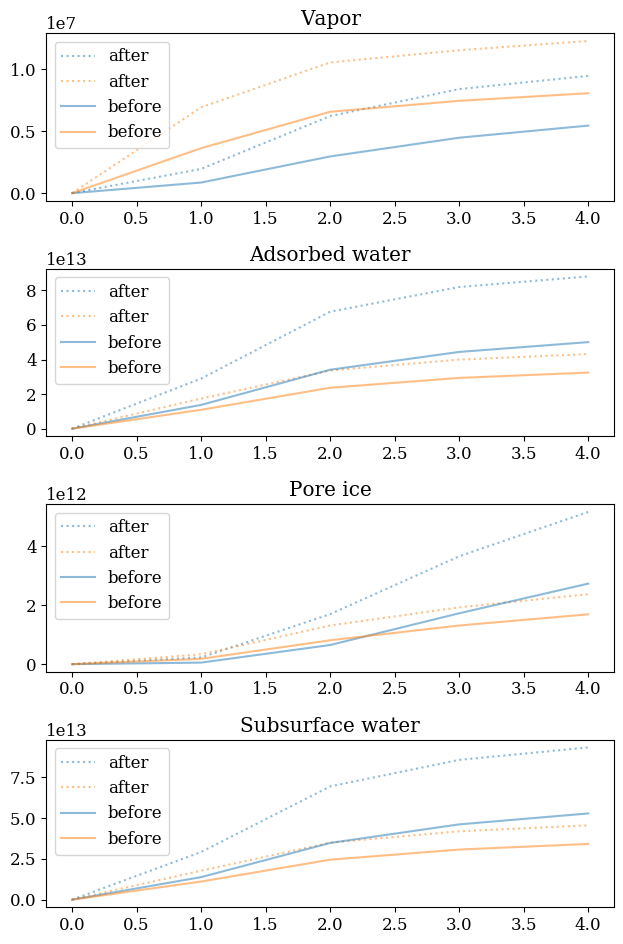

In [29]:
with open('/mnt/dram2/koba/data/251106c-t21-MIRAI1k-spinup-ads46.20/RG2MASS.asc') as f:
    d1 = np.loadtxt(f, skiprows=1, usecols=[2,3,4,5])
with open('/mnt/dram2/koba/data/251106c-t21-MIRAI1k-spinup-adsinhom/RG2MASS.asc') as f:
    d2 = np.loadtxt(f, skiprows=1, usecols=[2,3,4,5])
with open('/mnt/dram2/koba/data/Kobayashi-2026/MIRAI1k-spinup-ads46.20/RG2MASS.asc') as f:
    d3 = np.loadtxt(f, skiprows=1, usecols=[2,3,4,5])
with open('/mnt/dram2/koba/data/Kobayashi-2026/MIRAI1k-spinup-adsinhom/RG2MASS.asc') as f:
    d4 = np.loadtxt(f, skiprows=1, usecols=[2,3,4,5])

titles = [
    'Vapor',
    'Adsorbed water',
    'Pore ice',
    'Subsurface water',
]

ncols,nrows = 1,4
plt.rcParams['figure.figsize'] = [6.4*ncols, 4.8*nrows*0.5]

fig,axes = plt.subplots(nrows=nrows, ncols=ncols)
for i in range(nrows):
    axes[i].plot(d1[:5,i], alpha=0.5, label='after', color='tab:blue', linestyle='dotted')
    axes[i].plot(d2[:5,i], alpha=0.5, label='after', color='tab:orange', linestyle='dotted')
    axes[i].plot(d3[:5,i], alpha=0.5, label='before', color='tab:blue', linestyle='solid')
    axes[i].plot(d4[:5,i], alpha=0.5, label='before', color='tab:orange', linestyle='solid')
    axes[i].set_title(titles[i])
    axes[i].legend()
plt.show()